In [1]:
import pandas as pd
import seaborn as sns
import pandas_datareader as pr

In [2]:
#Seaborn kütüphanesinde bulunan gezegenler veri seti üzerinde görselleştirme yapacağım.
#Veri setini yükleyip bozulmaması için kopyasını alalım.
#Eksik değer varsa silelim.
planets=sns.load_dataset("planets")
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1.0,269.300,7.10,77.40,2006.0
1,Radial Velocity,1.0,874.774,2.21,56.95,2008.0
2,Radial Velocity,1.0,763.000,2.60,19.84,2011.0
3,Radial Velocity,1.0,326.030,19.40,110.62,2007.0
4,Radial Velocity,1.0,516.220,10.50,119.47,2009.0


In [3]:
df_num = df.select_dtypes(include = ("float64", "int64"))
df_num.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [4]:
#Veri setine göz atalım.
#Veri setinde 228 tane gözlem, 6 değişken varmış. Method değişkeni kategorik diğerleri sürekli değişken.
#Eksik veriler olduğunu görüyoruz.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 6 columns):
method            228 non-null object
number            227 non-null float64
orbital_period    212 non-null float64
mass              116 non-null float64
distance          209 non-null float64
year              227 non-null float64
dtypes: float64(5), object(1)
memory usage: 10.8+ KB


In [5]:
df.dtypes

method             object
number            float64
orbital_period    float64
mass              float64
distance          float64
year              float64
dtype: object

In [6]:
#Kategorik değişkenlerin tipini objectden kategoriye çevirdik. 
#Object ve kategorik arasında pek fark olmasa da bazı fonksiyonlar kategorik tipte değişken kabul ediyor.
df.method=pd.Categorical(df.method)
df.dtypes

method            category
number             float64
orbital_period     float64
mass               float64
distance           float64
year               float64
dtype: object

In [7]:
#Veri setinin betimsel istatistiklerine bir göz atalım.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,227.0,1.634361,1.205907,1.00000,1.00000,1.000,2.000,6.00
orbital_period,212.0,2407.627911,21888.270914,0.73654,3.91645,64.520,691.925,318280.00
mass,116.0,2.760794,4.119702,0.00360,0.07725,1.555,3.400,21.42
distance,209.0,155.287033,230.966789,1.35000,16.13000,56.310,193.000,1340.00
year,227.0,2008.493392,4.080354,1995.00000,2007.00000,2010.000,2011.000,2014.00


In [8]:
#Değişkenlerde kaç eksik veri var görelim.
df.isnull().sum()

method              0
number              1
orbital_period     16
mass              112
distance           19
year                1
dtype: int64

In [9]:
#Veri setindeki kategorik değişkenleri alalım.
kat_df=df.select_dtypes(include=["category"])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [10]:
#Kategorik değişkenin kendi içinde dağılımını görelim.
kat_df["method"].value_counts()

Radial Velocity              130
Transit                       66
Imaging                       21
Eclipse Timing Variations      9
R                              1
Astrometry                     1
Name: method, dtype: int64

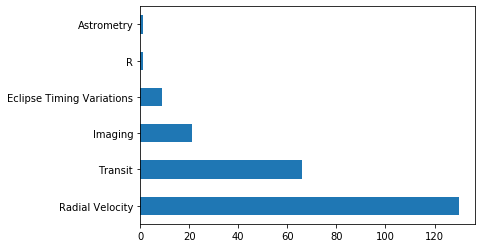

In [11]:
#Kategorik değişkenin frekanslarını yatay sütun grafiğiyle rahatlıkla görebiliriz.
kat_df["method"].value_counts().plot.barh();

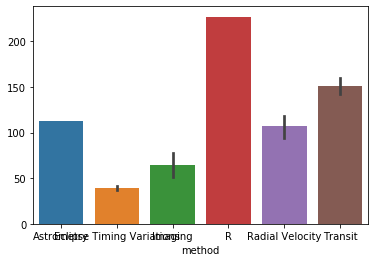

In [12]:
sns.barplot(x="method",y=df.method.index,data=df); 

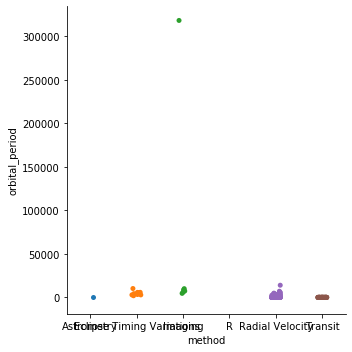

In [13]:
#Orbital period değişkeninin method değişkenine göre dağılımı.
sns.catplot(x="method",y="orbital_period",data=df);

In [14]:
#Seaborn kütüphanesinde bulunan bahşişler adlı başka bir veri setini yüklüyoruz.
tips=sns.load_dataset("tips")
df2=tips.copy()
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


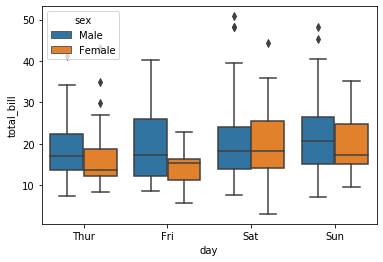

In [15]:
#Gün ve cinsiyet değişkeniyle gruplayarak toplam fiyatı inceleyelim.
#Kutu grafiğinde min-max değerlerini, 1. 3. çeyrekler açıklığını ve medyanı görebiliriz.
#Ayrıca üstte ayrı olarak nokta şeklinde görülen değerler aykırı gözlemlerdir. 
#Aykırı gözlemlerin tespit edilip müdahale edilmesi çok önemli.
#hue argümanı grafiğe 3. boyutu ekler.
#orient argümanı grafiği yatay yada dikey olarak değiştirmeye yarar.
sns.boxplot(x="day",y="total_bill",hue="sex",data=df2,orient="v");

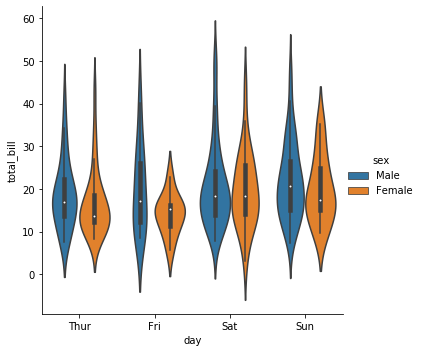

In [16]:
#Violin grafiği kutu grafiğiyle benzer noktaları gösterir.
#Ayrıca verinin dağılımı hakkında bilgi verir.
sns.catplot(kind="violin",x="day",hue="sex",y="total_bill",data=df2);

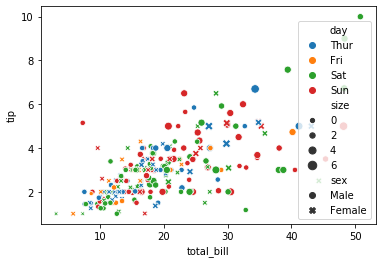

In [17]:
#Nokta grafiğinde veriyi bir çok şekilde gruplayabiliyoruz.
#hue argümanı renk kullanarak 3. boyutu ekler.
#style argümanı şekil kullanarak 4. boyutu ekler.
#size argümanı hacim kullanarak 5. boyutu ekler.
sns.scatterplot(x="total_bill",y="tip",hue="day",style="sex",size="size",data=df2);

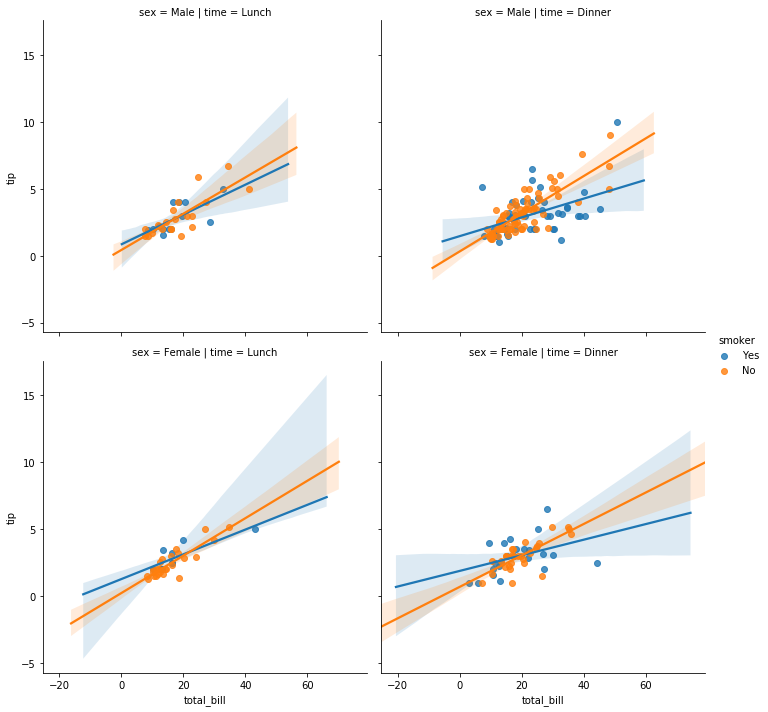

In [18]:
#Doğrusal model grafiği çizdirelim.
#Bu grafikte yine kategorilere ayırıp değişkenler arasındaki ilişkiyi daha rahat okuyabiliriz.
#col ve row argümanları verilen değişkenlere göre kolon ve sütun olarak kategorize eder.
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=df2);

In [19]:
#Seaborn kütüphanesinde bulunan çiçek yapraklarıyla ilgili olan veri setini yükledik.
df3=sns.load_dataset("iris")
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


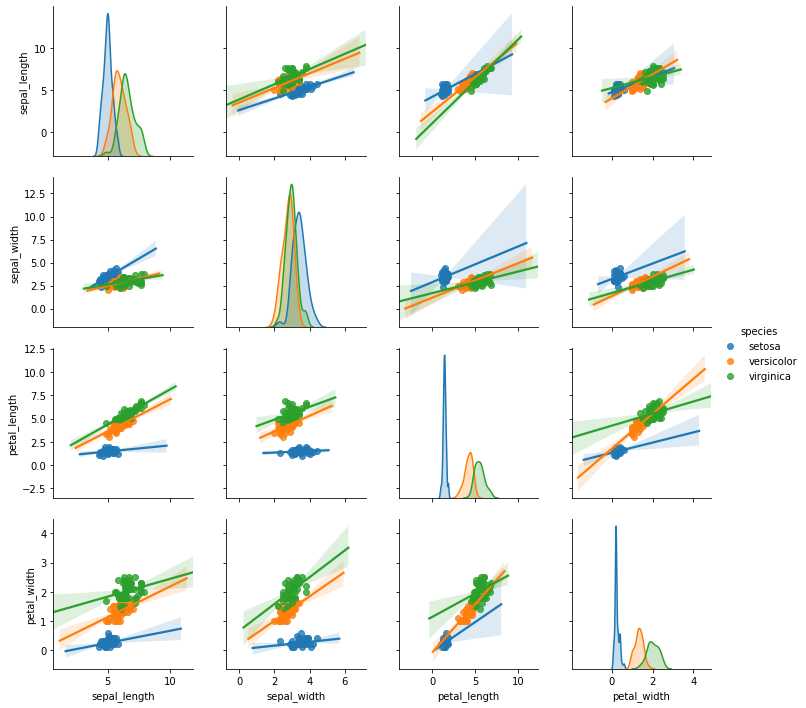

In [20]:
#İris veri setini species kategorik değişkenine göre ayırarak sürekli değişkenlerin ilişkisini görelim.
#Pairplot veri setindeki sayısal değişkenlerin aralarındaki ilişkiyi gösterir.
#Köşegende bulunan grafikler değişkenin dağılımını gösterir.
sns.pairplot(df3,hue="species",kind="reg");

In [21]:
#Seaborn kütüphanesinde bulunan uçuşlar adlı veri setini yükledik.
df4=sns.load_dataset("flights")
df4.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [22]:
#Veri setini görselleştirmek için heatmap grafiğini kullanmak istiyoruz.
#Öncelikle veri setini pivot table olacak şekilde düzenlememiz gerekiyor.
df4=df4.pivot(index="month",columns="year",values="passengers")
df4

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


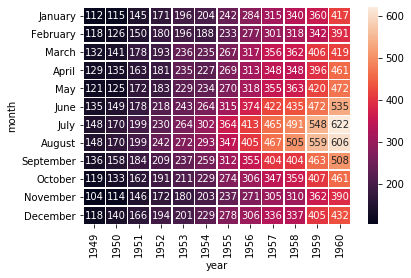

In [23]:
#annot argümanı her kutucuğun içine değerin gelmesini sağlar.
#linewidths kutucuklar arasındaki mesafeyi ayarlar.
sns.heatmap(df4,annot=True,fmt="d",linewidths=0.5);

In [24]:
df5=sns.load_dataset("fmri")
df5.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


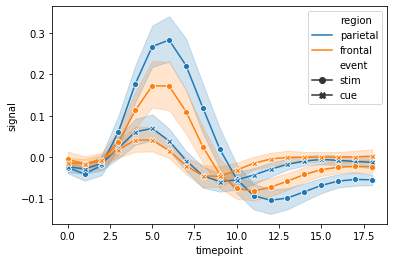

In [25]:
#Hue argümanı rengi kullanarak boyut ekler.
#Style argümanı çizgi üzerinde şekil kullanarak boyut ekler.
#markers argümanı çizgi üzerinde noktaların gözükmesini sağlar.
#
sns.lineplot(x="timepoint",y="signal",hue="region",style="event",markers=True,dashes=False,data=df5);

In [26]:
#Zaman grafiği oluşturmak için veri seti ekleyelim.
df6=pr.get_data_yahoo("AAPL",start="2016-01-01",end="2019-08-25")
df6.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,97.948441
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.493919
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.625145
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.673714
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.147873


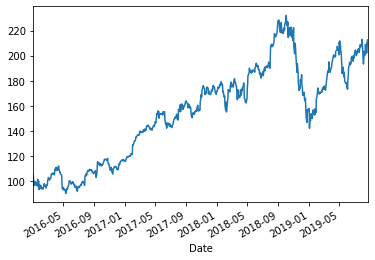

In [27]:
df6.Close.plot();